<a href="https://colab.research.google.com/github/franchaise/project/blob/main/credit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing of relevant libraries
import pandas as pd
from scipy.io import arff
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc


In [2]:
# mounting google drive to load data
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
#function to read and load dataset
def load_creditcard_data(data_path):
    """
    Read ARFF file dataset and change the format to pandas DataFrame.

    Parameters:
    data_path (str): The ARFF file path .

    Returns:
    pd.DataFrame: The DataFrame containing the loaded dataset.
    """
    # Read and load the ARFF file dataset
    data, meta = arff.loadarff(data_path)

    # Convert the loaded data to a pandas DataFrame
    data_df = pd.DataFrame(data)

    # Print the first few rows of the DataFrame
    print(data_df.head())

    return data_df

In [4]:
# Path to the data file
data_path = '/content/drive/MyDrive/credit_project/dataset.arff'

In [5]:
# Use define function to load the dataset to pandas DataFrame
data_df = load_creditcard_data(data_path)
print(data_df)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

# ***Exploratory Data Analysis (EDA)***


In [6]:
#Checking for missing values
missing_values = data_df.isna().sum()
print(missing_values)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Display the shape of the DataFrame
print(data_df.shape)

(284807, 31)


In [8]:
# Display a concise summary information of the DataFrame
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Change the 'Class' datatype to integer type
data_df['Class'] = data_df['Class'].astype(int)

In [10]:
# check and printout duplicated transactions
print(data_df.duplicated().sum())

1081


In [11]:
# Remove duplicated records from DataFrame
data_df.drop_duplicates(inplace=True)

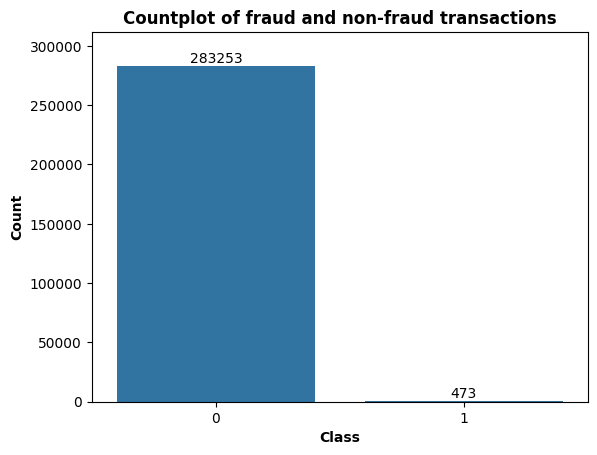

In [12]:
# Countplot of fraud and non-fraud transactions
ax = sns.countplot(x='Class', data=data_df)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Adjust the plot limits to make sure labels fit within the plot
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.1)

plt.title('Countplot of fraud and non-fraud transactions', fontweight='bold')
plt.xlabel('Class', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.show()

In [13]:
 #Filter the DataFrame to create a subset containing only fraud and non-fraud transactions
fraud = data_df[data_df['Class']== 1]
legit = data_df[data_df['Class']== 0]

In [14]:
# Display statistics for the 'Amount' column in the fraud transactions subset
print(fraud.Amount.describe())

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


In [15]:
# Display statistics for the 'Amount' column in the non-fraud transactions subset
print(legit.Amount.describe())

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


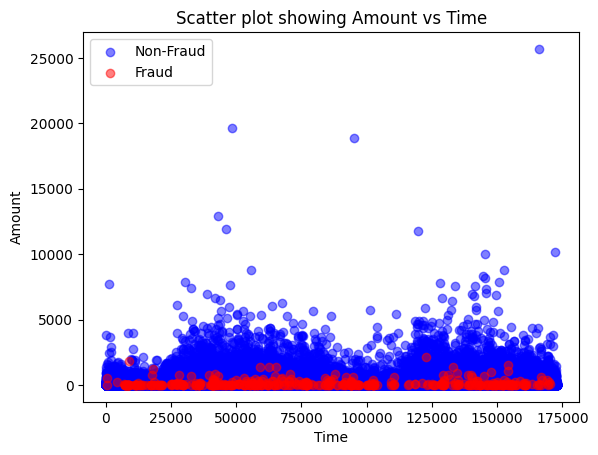

In [16]:
# Plot showing the distribution of transaction amounts over time

# Plot non-fraudulent transactions with blue color
plt.scatter(legit['Time'], legit['Amount'], c='blue', label='Non-Fraud', alpha=0.5)

# Plot fraudulent transactions with red color
plt.scatter(fraud['Time'], fraud['Amount'], c='red', label='Fraud', alpha=0.5)

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Amount')
plt.title('Scatter plot showing Amount vs Time')
plt.legend()

# Show the plot
plt.show()

<ipython-input-17-027373aca035>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Time', data=data_df, palette=colors)


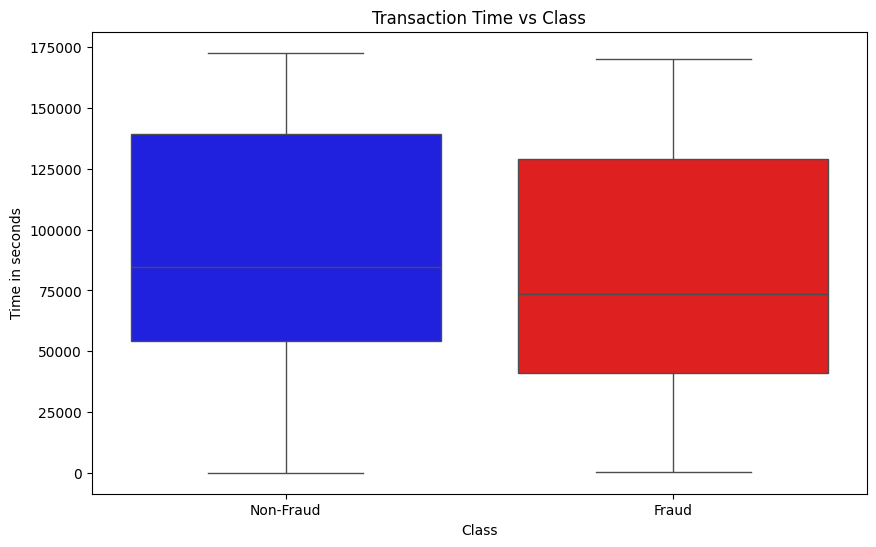

In [17]:
# Boxplot showing the distribution of transaction times for fraud and non-fraud transactions

# Setting figure size of plot
plt.figure(figsize=(10, 6))

# color selection
colors = ['blue', 'red']

# Create the boxplot
sns.boxplot(x='Class', y='Time', data=data_df, palette=colors)

# Adding title and labels to the plot
plt.title('Transaction Time vs Class')
plt.xlabel('Class')
plt.ylabel('Time in seconds')

# Customize the x-axis tick labels
plt.xticks(range(2), ['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

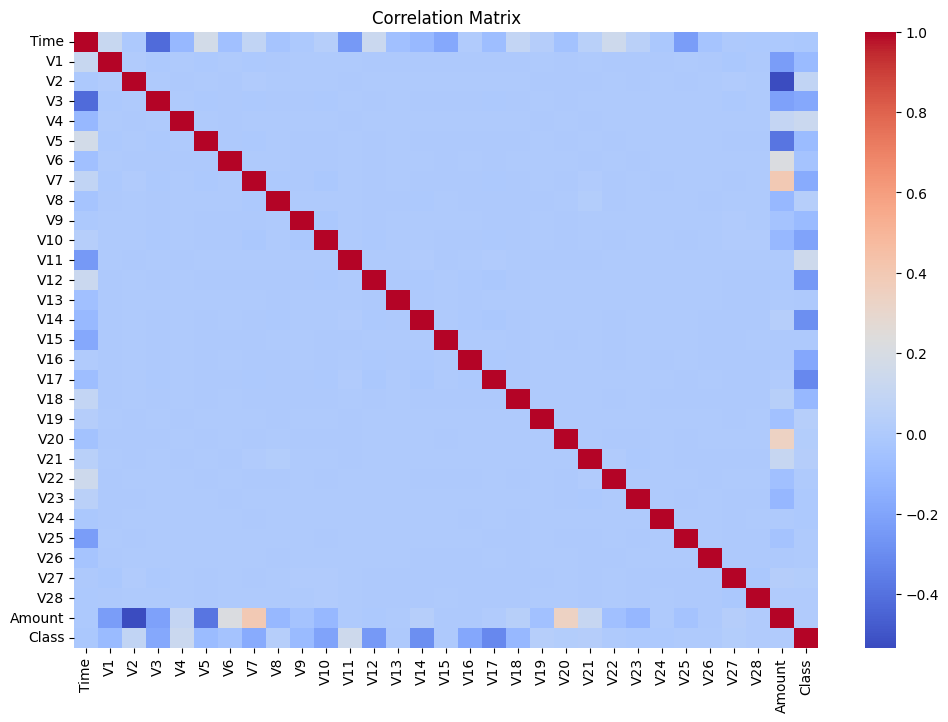

In [18]:
# Correlation matrix showing the relationship between various features

# Calculate the correlation matrix
correlation_matrix = data_df.corr()

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')

# Add title to the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

# **Preprocessing Stage**

In [19]:
# Scale the 'Amount' column
amount_values = data_df[['Amount']].values
scaler = RobustScaler()
data_df['Scaled_Amount'] = scaler.fit_transform(amount_values)

# Drop the original 'Amount' and 'Time' columns
data_df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Rename the 'Scaled_Amount' column to 'Amount'
data_df.rename(columns={'Scaled_Amount': 'Amount'}, inplace=True)

# Print the first few rows of the updated DataFrame
print(data_df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class    Amount  
0  0.12

In [20]:
# Splitting of the datset into train and test subset
X = data_df.drop('Class', axis=1)
y = data_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# ***Anomaly Detection Phase***

In [21]:
#Building Isolation forest model

# Parameters
n_estimators = 250
contamination = 0.01
random_state = 5

# Initialize and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=n_estimators,
                             contamination=contamination,
                             random_state=random_state)
iso_forest.fit(X_train)

# Predictions
y_train_pred = iso_forest.predict(X_train)
y_test_pred = iso_forest.predict(X_test)

In [22]:
# Convert predictions to binary labels
y_train_pred = np.where(y_train_pred == -1, 1, 0)
y_test_pred = np.where(y_test_pred == -1, 1, 0)

# Get anomaly scores
iso_train_scores = iso_forest.decision_function(X_train)
iso_test_scores = iso_forest.decision_function(X_test)

In [23]:
# Evaluation
print("Isolation Forest Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=['Legitimate', 'Fraudulent']))

Isolation Forest Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.99      1.00     56654
  Fraudulent       0.11      0.67      0.19        92

    accuracy                           0.99     56746
   macro avg       0.56      0.83      0.59     56746
weighted avg       1.00      0.99      0.99     56746



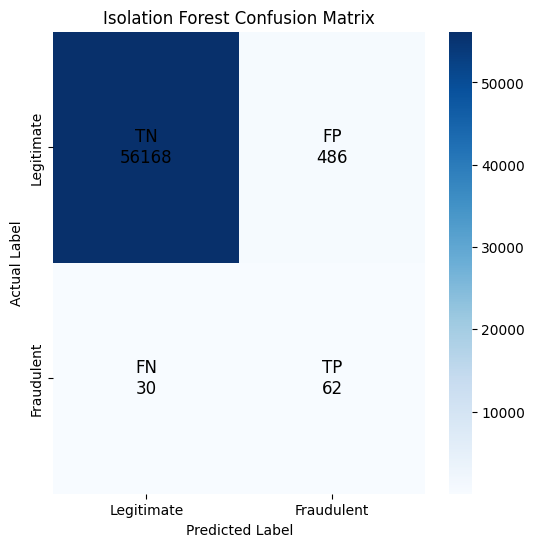

In [24]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=
 ['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center',
                 color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Isolation Forest Confusion Matrix')
plt.show()

In [25]:
#Model 2: Local Outlier Factor

# Initialize the LOF model
lof = LocalOutlierFactor(n_neighbors=300, contamination=0.17, novelty=False)

# Fit the model and predict outliers
y_pred = lof.fit_predict(X_train)

# Convert predictions to binary labels (1 for outliers, 0 for inliers)
y_pred_converted = np.where(y_pred == 1, 0, 1)

In [26]:

# Generate the classification report
report = classification_report(y_train, y_pred_converted, target_names=['Non-Fraud', 'Fraud'])

# Output the classification report
print(report)

              precision    recall  f1-score   support

   Non-Fraud       1.00      0.83      0.91    226599
       Fraud       0.01      0.91      0.02       381

    accuracy                           0.83    226980
   macro avg       0.50      0.87      0.46    226980
weighted avg       1.00      0.83      0.91    226980



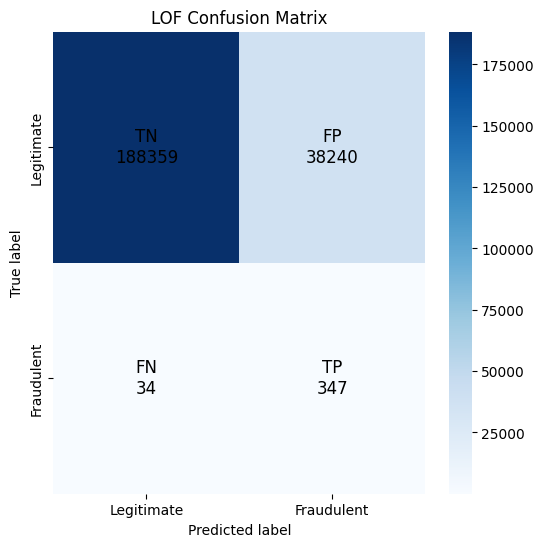

In [27]:
# Visualize the confusion matrix
cm = confusion_matrix(y_train, y_pred_converted)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('LOF Confusion Matrix')
plt.show()




In [28]:
#Model 3: Auto encoder
# Model architecture
batch_size = 32
original_dim = 29
latent_dim = 5
intermediate_dim1 = 20
intermediate_dim2 = 10
epochs = 10

x = Input(shape=(original_dim,), name="input")
h1 = Dense(intermediate_dim1, activation="tanh", name="encoding1", activity_regularizer=regularizers.l1(10e-5))(x)
h = Dense(intermediate_dim2, activation='relu', name="encoding")(h1)
z = Dense(latent_dim, activation='relu', name="encoder_out")(h)

encoder = Model(x, z, name="encoder")
encoder.summary()

decoder_h = Dense(intermediate_dim2, activation='relu', name="decoding1")(z)
decoder_h1 = Dense(intermediate_dim1, activation='tanh', name="decoding2")(decoder_h)
x_decoded = Dense(original_dim, activation='sigmoid', name="decoder_out")(decoder_h1)

autoencoder = Model(x, x_decoded)
autoencoder.summary()

autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae'])



Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding1 (Dense)                    │ (None, 20)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_out (Dense)                  │ (None, 5)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 865 (3.38 KB)

 Trainable params: 865 (3.38 KB)

 Non-trainable params: 0 (0.00 B)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)                   │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding1 (Dense)                    │ (None, 20)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoding (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_out (Dense)                  │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoding1 (Dense)                    │ (None, 10)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoding2 (Dense)                    │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_out (Dense)                  │ (None, 29)                  │             609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,754 (6.85 KB)

 Trainable params: 1,754 (6.85 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Training
history = autoencoder.fit(X_train, X_train,
                          epochs=epochs,
                          batch_size=batch_size,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1).history

# Extract loss values
loss = history['loss']
val_loss = history['val_loss']



Epoch 1/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 1.4158 - mae: 0.6444 - mse: 1.3999 - val_loss: 1.2876 - val_mae: 0.5976 - val_mse: 1.2796
Epoch 2/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.2676 - mae: 0.5970 - mse: 1.2600 - val_loss: 1.2732 - val_mae: 0.5896 - val_mse: 1.2664
Epoch 3/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 1.2536 - mae: 0.5876 - mse: 1.2466 - val_loss: 1.2664 - val_mae: 0.5849 - val_mse: 1.2595
Epoch 4/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 1.2866 - mae: 0.5859 - mse: 1.2796 - val_loss: 1.2593 - val_mae: 0.5805 - val_mse: 1.2525
Epoch 5/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 1.3287 - mae: 0.5796 - mse: 1.3222 - val_loss: 1.2492 - val_mae: 0.5745 - val_mse: 1.2424
Epoch 6/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 1.2506 - mae: 0.5737 - mse: 1.2441 - val_loss: 1.2416 - val_mae: 0.5703 - val_mse: 1.2354
Epoch 7/10
7094/7094 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 1.2475 - mae: 0.570

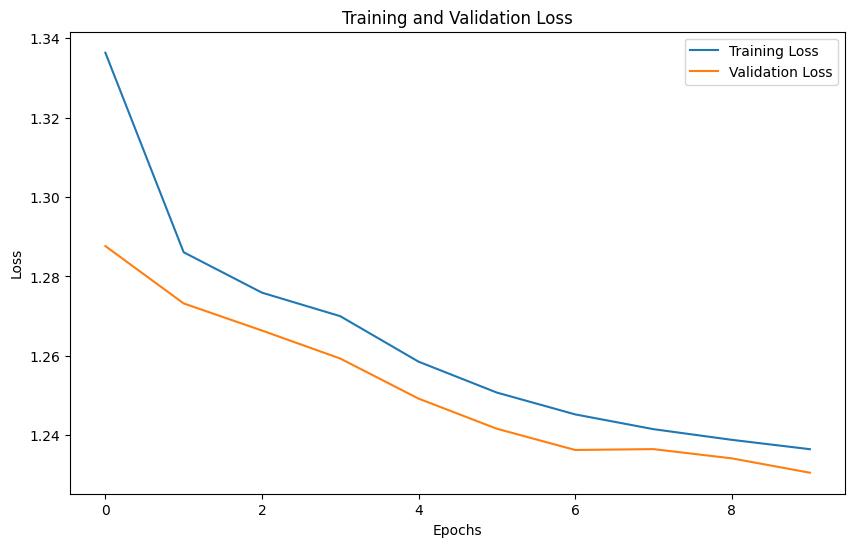

In [30]:


# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting training and validation loss
ax1.plot(loss, label='Training Loss')
ax1.plot(val_loss, label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()



In [31]:

# Reconstruction error
X_train_pred = autoencoder.predict(X_train)
X_test_pred = autoencoder.predict(X_test)
train_reconstruction_error = np.mean(np.square(X_train - X_train_pred), axis=1)
test_reconstruction_error = np.mean(np.square(X_test - X_test_pred), axis=1)
threshold = np.percentile(train_reconstruction_error, 95)
print(f"Reconstruction error threshold: {threshold}")





7094/7094 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Reconstruction error threshold: 2.638995204993991


In [32]:
# Using construction error for anomaly detection
y_train_pred = (train_reconstruction_error > threshold).astype(int)
y_test_pred = (test_reconstruction_error > threshold).astype(int)

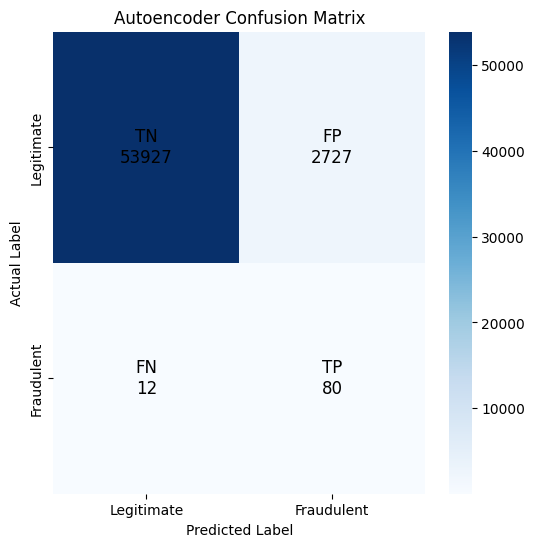

Autoencoder Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      0.95      0.98     56654
  Fraudulent       0.03      0.87      0.06        92

    accuracy                           0.95     56746
   macro avg       0.51      0.91      0.52     56746
weighted avg       1.00      0.95      0.97     56746

Confusion Matrix:


In [33]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=
 ['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center',
                 color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Autoencoder Confusion Matrix')
plt.show()

# Autoencoder Evaluation
print("Autoencoder Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=
 ['Legitimate', 'Fraudulent']))
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred)



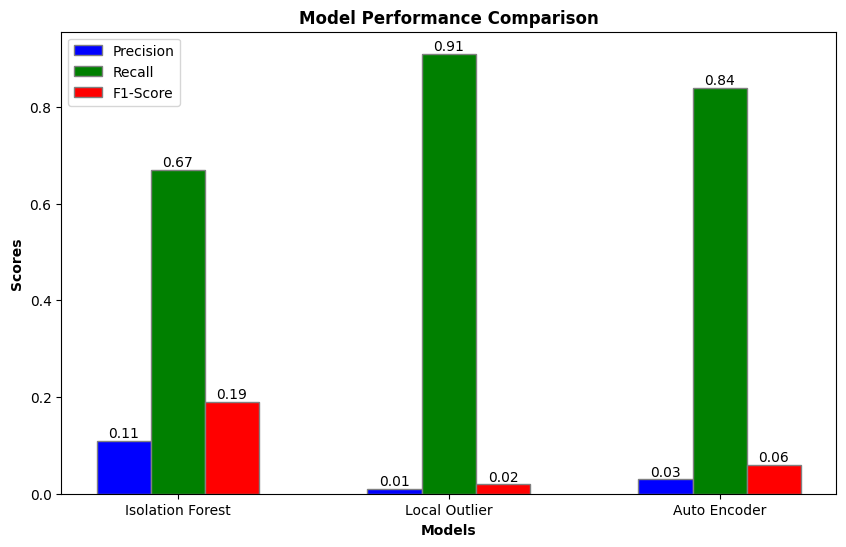

In [34]:
#Visualizing result from all models

# Anomaly model Data
models = ['Isolation Forest', 'Local Outlier', 'Auto Encoder']
precision = [0.11, 0.01, 0.03]
recall = [0.67, 0.91, 0.84]
f1_score = [0.19, 0.02, 0.06]

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
bars2 = plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
bars3 = plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add legend
plt.legend()

# Add value labels on each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Show the plot
plt.show()

# **Predictive stage**



In [35]:
# Further split training set for stacking (train and validation)
X_train_base, X_train_meta, y_train_base, y_train_meta = train_test_split(X_train, y_train, test_size=0.5, random_state=5)

In [36]:
smote = SMOTE(random_state=5)
X_train_base_smote, y_train_base_smote = smote.fit_resample(X_train_base, y_train_base)

In [42]:
#Trying out Anomaly score as a feature but provedin effecitive

'''# Train and Evaluate Random Forest Without Anomaly Score
model_original = RandomForestClassifier(n_estimators=100, random_state=42)
model_original.fit(X_train, y_train)

# Predict using the original test set
y_pred_original = model_original.predict(X_test)'''



'# Train and Evaluate Random Forest Without Anomaly Score\nmodel_original = RandomForestClassifier(n_estimators=100, random_state=42)\nmodel_original.fit(X_train, y_train)\n\n# Predict using the original test set\ny_pred_original = model_original.predict(X_test)'

In [43]:
'''# Evaluation without anomaly score
print("\nOriginal Random Forest Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_original, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_original))'''




'# Evaluation without anomaly score\nprint("\nOriginal Random Forest Model Evaluation:")\nprint("Classification Report:")\nprint(classification_report(y_test, y_pred_original, target_names=[\'Legitimate\', \'Fraudulent\']))\n\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_pred_original))'

In [44]:
'''# Enrich the datasets with anomaly scores
lof_anomaly_scores_test = -lof.fit(X_test).negative_outlier_factor_
X_train_enriched = np.hstack((X_train, lof_anomaly_scores.reshape(-1, 1)))
X_test_enriched = np.hstack((X_test, lof_anomaly_scores_test.reshape(-1, 1)))

#  Train and Evaluate Random Forest With Anomaly Score
model_enriched = RandomForestClassifier(n_estimators=100, random_state=42)
model_enriched.fit(X_train_enriched, y_train)

# Predict using the enriched test set
y_pred_enriched = model_enriched.predict(X_test_enriched)'''



'# Enrich the datasets with anomaly scores\nlof_anomaly_scores_test = -lof.fit(X_test).negative_outlier_factor_\nX_train_enriched = np.hstack((X_train, lof_anomaly_scores.reshape(-1, 1)))\nX_test_enriched = np.hstack((X_test, lof_anomaly_scores_test.reshape(-1, 1)))\n\n#  Train and Evaluate Random Forest With Anomaly Score\nmodel_enriched = RandomForestClassifier(n_estimators=100, random_state=42)\nmodel_enriched.fit(X_train_enriched, y_train)\n\n# Predict using the enriched test set\ny_pred_enriched = model_enriched.predict(X_test_enriched)'

In [45]:
'''# Evaluation with anomaly score
print("\nEnriched Random Forest Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, y_pred_enriched, target_names=['Legitimate', 'Fraudulent']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_enriched))'''

'# Evaluation with anomaly score\nprint("\nEnriched Random Forest Model Evaluation:")\nprint("Classification Report:")\nprint(classification_report(y_test, y_pred_enriched, target_names=[\'Legitimate\', \'Fraudulent\']))\n\nprint("Confusion Matrix:")\nprint(confusion_matrix(y_test, y_pred_enriched))'

# ***using stacking method with anomaly detection model***

In [38]:

# Anomaly Detection model
lof = LocalOutlierFactor(n_neighbors=20, novelty=True)
lof.fit(X_train_base_smote)
anomaly_scores_train_meta = -lof.decision_function(X_train_meta)  # Higher scores indicate more abnormal

#  Train base models on the resampled (balanced) data
xgb = XGBClassifier(n_estimators=100, random_state=5, use_label_encoder=False, eval_metric='logloss')
gb = GradientBoostingClassifier(n_estimators=100, random_state=5)

xgb.fit(X_train_base_smote, y_train_base_smote)
gb.fit(X_train_base_smote, y_train_base_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:12:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GradientBoostingClassifier(random_state=5)

In [39]:
# Predict with base models to create new features for meta-model
xgb_predictions = xgb.predict_proba(X_train_meta)[:, 1]  # Probability for class 1
gb_predictions = gb.predict_proba(X_train_meta)[:, 1]  # Probability for class 1

# Combine predictions with anomaly scores
X_train_meta_combined = np.vstack((xgb_predictions, gb_predictions, anomaly_scores_train_meta)).T

# Train meta-model
# Using Logistic Regression as the meta-model with balanced class weights
meta_model = LogisticRegression(max_iter=1000, n_jobs=-1, class_weight='balanced')
meta_model.fit(X_train_meta_combined, y_train_meta)

# Prepare test data for final prediction
anomaly_scores_test = -lof.decision_function(X_test)





/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [40]:
# Predict with base models on test data
xgb_predictions_test = xgb.predict_proba(X_test)[:, 1]
gb_predictions_test = gb.predict_proba(X_test)[:, 1]

# Combine predictions with anomaly scores for test data
X_test_combined = np.vstack((xgb_predictions_test, gb_predictions_test, anomaly_scores_test)).T

# Final prediction with meta-model
probabilities = meta_model.predict_proba(X_test_combined)[:, 1]
threshold = 0.3  # Adjust based on precision-recall trade-offs
final_predictions = (probabilities >= threshold).astype(int)

In [41]:
# Evaluation
print(classification_report(y_test, final_predictions))

# Calculate Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, probabilities)
auc_score = auc(recall, precision)
print(f'Precision-Recall AUC: {auc_score:.2f}')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56654
           1       0.07      0.91      0.13        92

    accuracy                           0.98     56746
   macro avg       0.53      0.95      0.56     56746
weighted avg       1.00      0.98      0.99     56746

Precision-Recall AUC: 0.85


In [42]:
# Generate precision and recall values for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, probabilities)

# Calculate F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
# Remove NaN values
f1_scores = np.nan_to_num(f1_scores)

# Find the index of the highest F1 score
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

Optimal Threshold: 0.9999646785685934


In [43]:
# Apply the optimal threshold to classify probabilities


# Assuming y_test, probabilities, and optimal_threshold are already defined
final_predictions_optimal = (probabilities >= optimal_threshold).astype(int)

# Evaluation with the optimal threshold
print(classification_report(y_test, final_predictions_optimal))

# Recalculate Precision-Recall AUC with the optimal threshold (for comparison)
precision_opt, recall_opt, _ = precision_recall_curve(y_test, final_predictions_optimal)
auc_score_opt = auc(recall_opt, precision_opt)
print(f'Precision-Recall AUC with Optimal Threshold: {auc_score_opt:.2f}')



              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56654
           1       0.97      0.80      0.88        92

    accuracy                           1.00     56746
   macro avg       0.99      0.90      0.94     56746
weighted avg       1.00      1.00      1.00     56746

Precision-Recall AUC with Optimal Threshold: 0.89


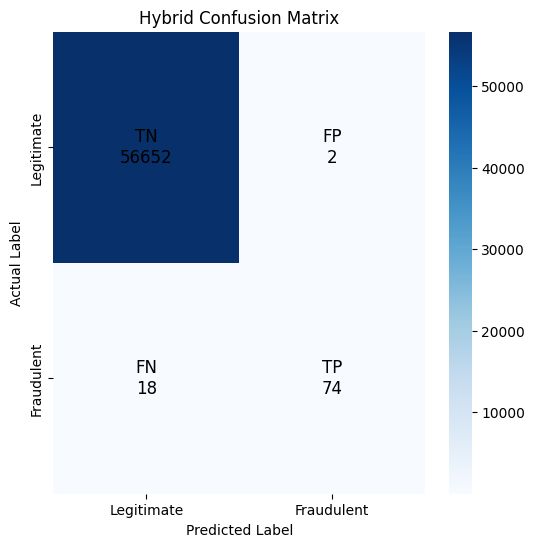

In [44]:
# Visualize Confusion Matrix
cm = confusion_matrix(y_test, final_predictions_optimal)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Hybrid Confusion Matrix')
plt.show()

# ***Comparing with standalone predicitve models***

In [45]:
# Apply SMOTE to the training set for standalone models
smote = SMOTE(random_state=5)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [48]:

# Train and Evaluate Gradient Boosting
GB_model = GradientBoostingClassifier(n_estimators=100, random_state=5)
GB_model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier(random_state=5)

In [55]:

# Predicting probabilities on the original test set
GB_pred_proba = GB_model.predict_proba(X_test)[:, 1]

# setting threshold
custom_threshold = 0.9

# Apply the custom threshold to get binary predictions
GB_pred = (GB_pred_proba >= custom_threshold).astype(int)


# Evaluation score
print("\nGradient Boost Evaluation:")
print("Classification Report:")
print(classification_report(y_test, GB_pred, target_names=['Legitimate', 'Fraudulent']))


Gradient Boost Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56654
  Fraudulent       0.55      0.86      0.67        92

    accuracy                           1.00     56746
   macro avg       0.77      0.93      0.83     56746
weighted avg       1.00      1.00      1.00     56746



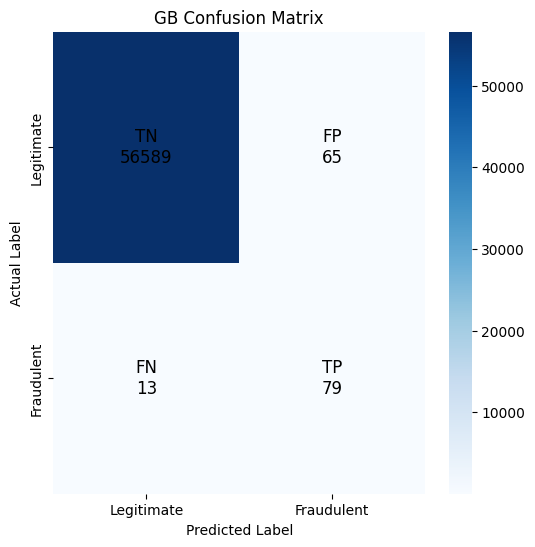

In [56]:

# Confusion Matrix
cm = confusion_matrix(y_test, GB_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=
 ['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center',
                 color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('GB Confusion Matrix')
plt.show()




In [57]:
# XGboost classifier
# Train and Evaluate XGBClassfier
Xgb_model = XGBClassifier(n_estimators=100, random_state=5, use_label_encoder=False, eval_metric='logloss')
Xgb_model.fit(X_train_smote, y_train_smote)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:18:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=5, ...)

In [58]:
# Predict using the original test set
Xgb_pred= Xgb_model.predict(X_test)


XGB classifier Model Evaluation:
Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56654
  Fraudulent       0.79      0.88      0.83        92

    accuracy                           1.00     56746
   macro avg       0.89      0.94      0.92     56746
weighted avg       1.00      1.00      1.00     56746



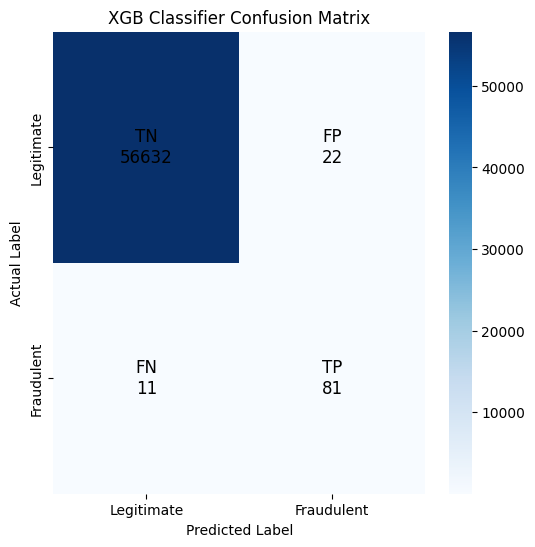

In [59]:
# Evaluation
print("\nXGB classifier Model Evaluation:")
print("Classification Report:")
print(classification_report(y_test, Xgb_pred, target_names=['Legitimate', 'Fraudulent']))

# Confusion Matrix
cm = confusion_matrix(y_test, Xgb_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('XGB Classifier Confusion Matrix')
plt.show()

In [60]:

# Train and Evaluate Logistic Regression
Lr_model = LogisticRegression(max_iter=1000, random_state=5)
Lr_model.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000, random_state=5)

In [61]:
# Predict using the original test set
lr_pred = Lr_model.predict(X_test)

In [71]:
# Predict probabilities using the original test set
log_reg_pred_proba = Lr_model.predict_proba(X_test)[:, 1]

# Define a custom threshold
custom_threshold = 0.99

# Apply the custom threshold to get binary predictions
log_reg_pred = (log_reg_pred_proba >= custom_threshold).astype(int)

# Evaluate the predictions
print(classification_report(y_test, log_reg_pred, target_names=['Legitimate', 'Fraudulent']))

              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56654
  Fraudulent       0.56      0.85      0.67        92

    accuracy                           1.00     56746
   macro avg       0.78      0.92      0.84     56746
weighted avg       1.00      1.00      1.00     56746



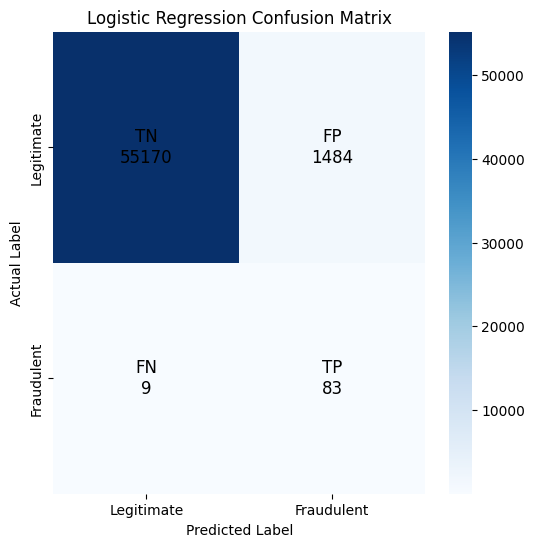

In [72]:
# Confusion Matrix
cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])

# Add labels for TN, FP, FN, TP
labels = np.array([['TN', 'FP'], ['FN', 'TP']])
for i in range(2):
    for j in range(2):
        plt.text(j + 0.5, i + 0.5, f'{labels[i, j]}\n{cm[i, j]}',
                 horizontalalignment='center', verticalalignment='center', color='black', fontsize=12)

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# ***Comparing Hybrid and standalone***

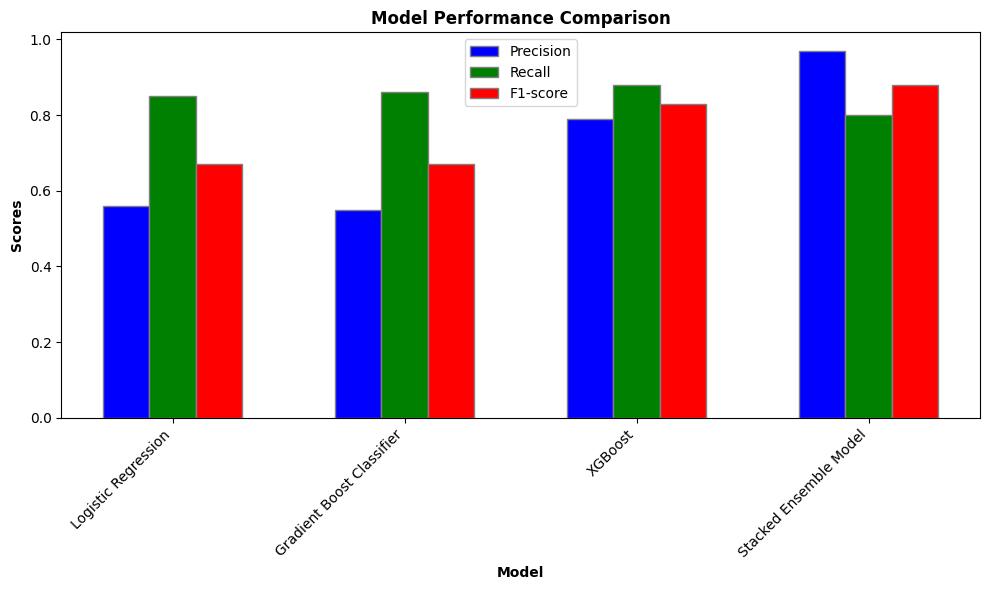

In [73]:


# Data
models = [ 'Logistic Regression', 'Gradient Boost Classifier', 'XGBoost', 'Stacked Ensemble Model']
precision = [0.56, 0.55, 0.79, 0.97]
recall = [0.85, 0.86, 0.88, 0.80]
f1_score = [ 0.67, 0.67, 0.83, 0.88]

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the grouped bar chart
plt.figure(figsize=(10, 6))
plt.bar(r1, precision, color='b', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='g', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='r', width=bar_width, edgecolor='grey', label='F1-score')

# Add labels
plt.xlabel('Model', fontweight='bold')
plt.ylabel('Scores', fontweight='bold')
plt.title('Model Performance Comparison', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models, rotation=45, ha='right')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()